In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import (train_test_split, StratifiedKFold,
                                     cross_val_score, learning_curve,
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_curve, auc,
                             mean_squared_error, mean_absolute_error, r2_score)

# 1. Category Example — Breast Cancer Dataset
X_cls, y_cls = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls,
                                                    test_size=0.3, random_state=42)

# Unregularized logistic regression
clf = LogisticRegression(max_iter=10000, solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluation indicators
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {rec:.3f}, F1: {f1:.3f}")
print(f"AUC: {roc_auc:.3f}")


Confusion Matrix:
 [[ 59   4]
 [  2 106]]
Accuracy: 0.965, Precision: 0.964, Recall: 0.981, F1: 0.972
AUC: 0.998


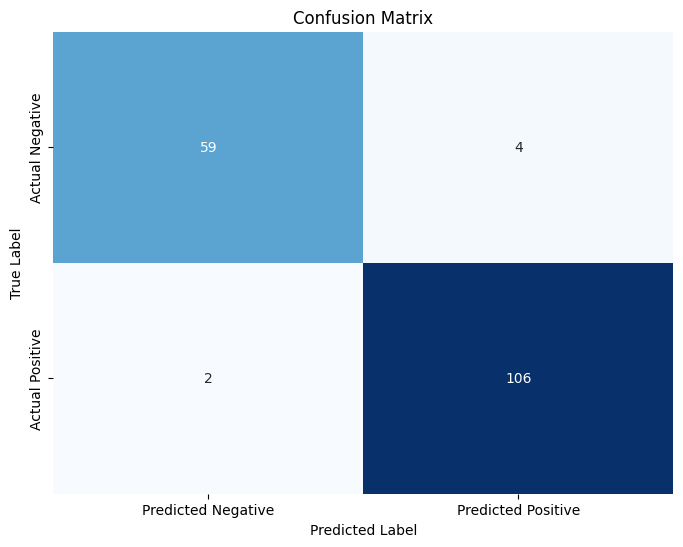

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

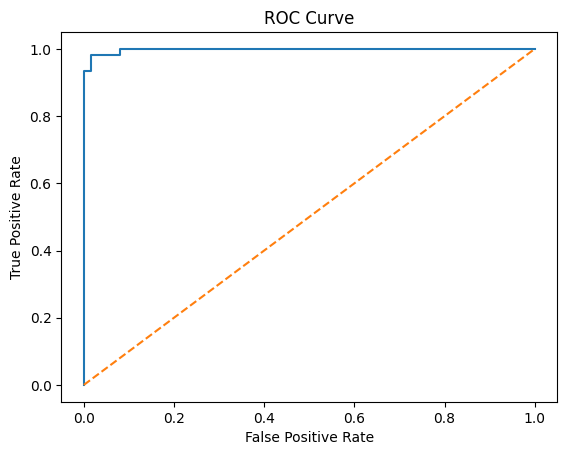

In [ ]:
# OC curve
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


In [ ]:
# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(clf, X_cls, y_cls, cv=skf, scoring='accuracy')
print("Stratified K-Fold CV Accuracies:", np.round(cv_scores, 3))
print("Mean CV Accuracy:", cv_scores.mean())

Stratified K-Fold CV Accuracies: [0.947 0.921 0.956 0.965 0.965]
Mean CV Accuracy: 0.9508150908244062


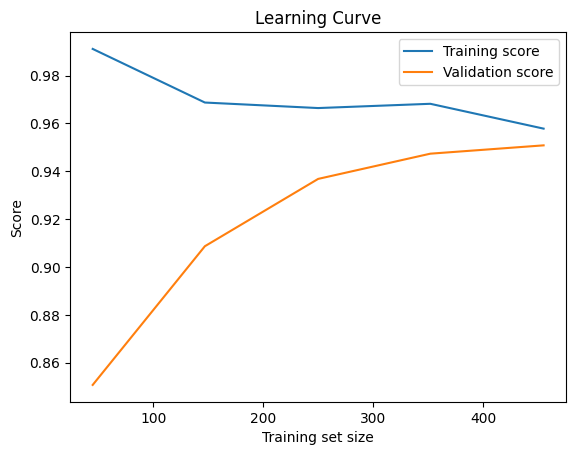

In [ ]:
# Learning curve example
train_sizes, train_scores, val_scores = learning_curve(
    clf, X_cls, y_cls, cv=skf, train_sizes=np.linspace(0.1, 1.0, 5), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.title("Learning Curve")
plt.xlabel("Training set size")
plt.ylabel("Score")
plt.legend()
plt.show()


In [ ]:
# 2. Regression Example — Diabetes Dataset
X_reg, y_reg = load_diabetes(return_X_y=True)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg,
                                                            test_size=0.3, random_state=42)

# Ridge and Lasso
for model in [Ridge(alpha=1.0), Lasso(alpha=0.1)]:
    model.fit(X_train_r, y_train_r)
    y_pred_r = model.predict(X_test_r)
    mse = mean_squared_error(y_test_r, y_pred_r)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_r, y_pred_r)
    r2 = r2_score(y_test_r, y_pred_r)
    print(f"{model.__class__.__name__} -> MSE: {mse:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")

# 3. Hyperparameter Tuning Example — Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                           cv=skf, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Grid Search Best Params:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=param_grid, n_iter=5,
                                   cv=skf, scoring='accuracy', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
print("Random Search Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Ridge -> MSE: 3112.966, RMSE: 55.794, MAE: 45.464, R2: 0.423
Lasso -> MSE: 2775.165, RMSE: 52.680, MAE: 41.939, R2: 0.486
Grid Search Best Params: {'max_depth': 7, 'n_estimators': 200}
Best CV Score: 0.9624050632911393
Random Search Best Params: {'n_estimators': 200, 'max_depth': 7}
Best CV Score: 0.9624050632911393
